# offline eval lerobot

In [ ]:
from lerobot.common.datasets.lerobot_dataset import LeRobotDataset, LeRobotDatasetMetadata
import random

root = "/home/lejurobot/hx/kuavo/Task12_zed_dualArm/lerobot"
repo_id = "Task12_zed_dualArm/lerobot"
local_files_only = True


episode_index = 1

le_dataset = LeRobotDataset(repo_id=repo_id, local_files_only=local_files_only, root=root)

from_idx = le_dataset.episode_data_index["from"][episode_index].item()
to_idx = le_dataset.episode_data_index["to"][episode_index].item()
num_episodes = le_dataset.episode_data_index["from"].shape[0]
selected_episodes = random.sample(range(num_episodes), 2) if num_episodes >= 2 else list(range(num_episodes))

timestamps = [x / le_dataset.fps for x in range(to_idx - from_idx)]
print(timestamps)
delta_timestamps = {
    "observation.state": timestamps,
    # "observation.images.cam_h": timestamps,
    "observation.images.cam_l": timestamps,
    "observation.images.cam_r": timestamps,
    "observation.images.left": timestamps,
    "observation.images.right": timestamps,
    "action": timestamps,
}
val_dataset = LeRobotDataset(repo_id=repo_id, local_files_only=local_files_only, root=root, delta_timestamps=delta_timestamps)
one_eps =next(iter(val_dataset))
observation_keys = [obs_k for obs_k in one_eps.keys() if "observation" in obs_k and "pad" not in obs_k]
for k, v in one_eps.items():
    if k in observation_keys or k == "action":
        print(k, v.shape)
        print(v.min(), v.max())


Returning existing local_dir `/home/leju-ali/luyuang/nls/rosbag/v1/lerobot` as remote repo cannot be accessed in `snapshot_download` (None).
Returning existing local_dir `/home/leju-ali/luyuang/nls/rosbag/v1/lerobot` as remote repo cannot be accessed in `snapshot_download` (None).
Returning existing local_dir `/home/leju-ali/luyuang/nls/rosbag/v1/lerobot` as remote repo cannot be accessed in `snapshot_download` (None).
Returning existing local_dir `/home/leju-ali/luyuang/nls/rosbag/v1/lerobot` as remote repo cannot be accessed in `snapshot_download` (None).


[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5]
observation.images.head_cam_r torch.Size([1

In [ ]:
from pathlib import Path
import torch
from lerobot.common.policies.diffusion.modeling_diffusion import DiffusionPolicy
from lerobot.common.policies.act.modeling_act import ACTPolicy
import os

device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")  
'''
act
/wks/dataset/20250309/act/outputs/train/2025-03-11/17-24-11_act/checkpoints/500000

diffusion
/wks/dataset/20250309/500000/outputs/train/2025-03-09/23-43-51_diffusion/checkpoints/500000
'''
# Task12_zed_dualArm
ckpt_path = "/home/lejurobot/hx/kuavo_il/outputs/train/2025-03-20/19-16-45_act/checkpoints/100000/pretrained_model"
ckpt_path = "/home/lejurobot/hx/kuavo_il/outputs/train/2025-03-21/02-25-36_act/checkpoints/120000/pretrained_model"
ckpt_size = os.path.getsize(ckpt_path + '/model.safetensors') / (1024 ** 3)

pretrained_policy_path = Path(ckpt_path)
policy = ACTPolicy.from_pretrained(pretrained_policy_path)
# policy.num_inference_steps = 10

policy.eval()
policy.to(device)
policy.reset()

obs_state_dim = policy.config.input_features['observation.state'].shape[0]
n_obs_step = policy.config.n_obs_steps
test_cfg = {
    "slice":[0, 16],
    "fps": 10,
    "low_dim": obs_state_dim,
    "n_obs_step": n_obs_step,
}
print(obs_state_dim)
assert obs_state_dim == test_cfg['slice'][1] - test_cfg['slice'][0]


AttributeError: 'DiffusionConfig' object has no attribute 'use_vae'

In [ ]:
import numpy as np
from collections import defaultdict
import tqdm

all_img: defaultdict[str, list] = defaultdict(list)
upBody_lowDim: defaultdict[str, list] = defaultdict(list)

def add_noise_to_images(images, noise_level=0.2):
    """ 给归一化图像添加噪声 """
    noise = (np.random.rand(*images.shape) * 2 - 1) * noise_level
    return np.clip(images + noise, 0, 1)
#.unsqueeze(0)
def add_noise_to_state(data, noise_scale=0.5):
    """ 给状态或动作数据添加噪声 """
    noise = np.random.uniform(-noise_scale, noise_scale, size=data.shape)
    return data + noise
    
def le_predict(obs_seq, act_seq, policy, device):
    pred_actions, true_actions, true_states = [], [], []
    WINDOW_SIZE = policy.config.n_obs_steps
    for step in tqdm.trange(len(next(iter(obs_seq.values()))) - (WINDOW_SIZE - 1)):
        observation = {
            key: torch.from_numpy(np.stack(values[step:step + WINDOW_SIZE])).float().to(device)
            for key, values in obs_seq.items()
        }

        with torch.inference_mode():
            action = policy.select_action(observation).cpu().numpy()
        
        final_step = step + WINDOW_SIZE - 1
        pred_actions.append(action)
        true_actions.append(act_seq[final_step])
        true_states.append(obs_seq['observation.state'][final_step])

    return pred_actions, true_actions, true_states

def process_images_from_tensor_to_uint8(all_img):
    for img_eps in all_img.values():
        for i in range(len(img_eps)):
            if isinstance(img_eps[i], torch.Tensor):
                img_eps[i] = img_eps[i].cpu().numpy()  # 先转为 NumPy 数组
                img_eps[i] = np.array([
                    np.transpose((img * 255).clip(0, 255).astype(np.uint8), (1, 2, 0))
                    for img in img_eps[i]
                ])
    return all_img

def prepare_ledata_seq(val_dataset, eps_idx):
    one_eps = val_dataset.get_one_episode(val_dataset.episode_data_index["from"][eps_idx].item())

    observation_keys = [obs_k for obs_k in one_eps.keys() if "observation" in obs_k and "pad" not in obs_k]
    obs_seq = {
        k: add_noise_to_state(one_eps[k], noise_scale=0.002)
        for k in observation_keys if 'images' not in k
    }
    obs_seq.update({
        k: add_noise_to_images(one_eps[k], noise_level=0.002)
        for k in observation_keys if 'images' in
        k
    })
    act_seq = one_eps['action'][:, test_cfg['slice'][0]:test_cfg['slice'][1]]
    return obs_seq, act_seq
    
def main(selected_episodes, dataset, test_cfg, policy, device):
    all_pred_actions, all_true_actions, all_true_states = [], [], []
    all_img = defaultdict(list)
    
    for i in selected_episodes:
        obs_seq, act_seq = prepare_ledata_seq(dataset, eps_idx=i)
        pred_actions, true_actions, true_states = le_predict(obs_seq, act_seq, policy, device)
        
        all_pred_actions.append(np.array(pred_actions))
        all_true_actions.append(np.array(true_actions))
        all_true_states.append(np.array(true_states))
        
        for key in [k for k in obs_seq.keys() if "images" in k]:
            all_img[key].append(obs_seq[key])
    
    all_img = process_images_from_tensor_to_uint8(all_img)
    upBody_lowDim = {
        "pred_actions": all_pred_actions,
        "true_actions": all_true_actions,
        "true_states": all_true_states,
    }
    return all_img, upBody_lowDim
    
all_img, upBody_lowDim = main(selected_episodes, val_dataset, test_cfg, policy, device)


100%|██████████| 197/197 [00:01<00:00, 144.64it/s]


In [ ]:
for k,v in upBody_lowDim.items():
    print(k, len(v), v[0].shape)

for k, v in all_img.items():
    print(k, len(v),)


pred_actions 2 (197, 1, 16)
true_actions 2 (197, 16)
true_states 2 (197, 16)
observation.images.left 2
observation.images.right 2
observation.images.cam_r 2
observation.images.cam_l 2


/home/lejurobot/hx/kuavo_il/kuavo/notebooks_check/plot.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


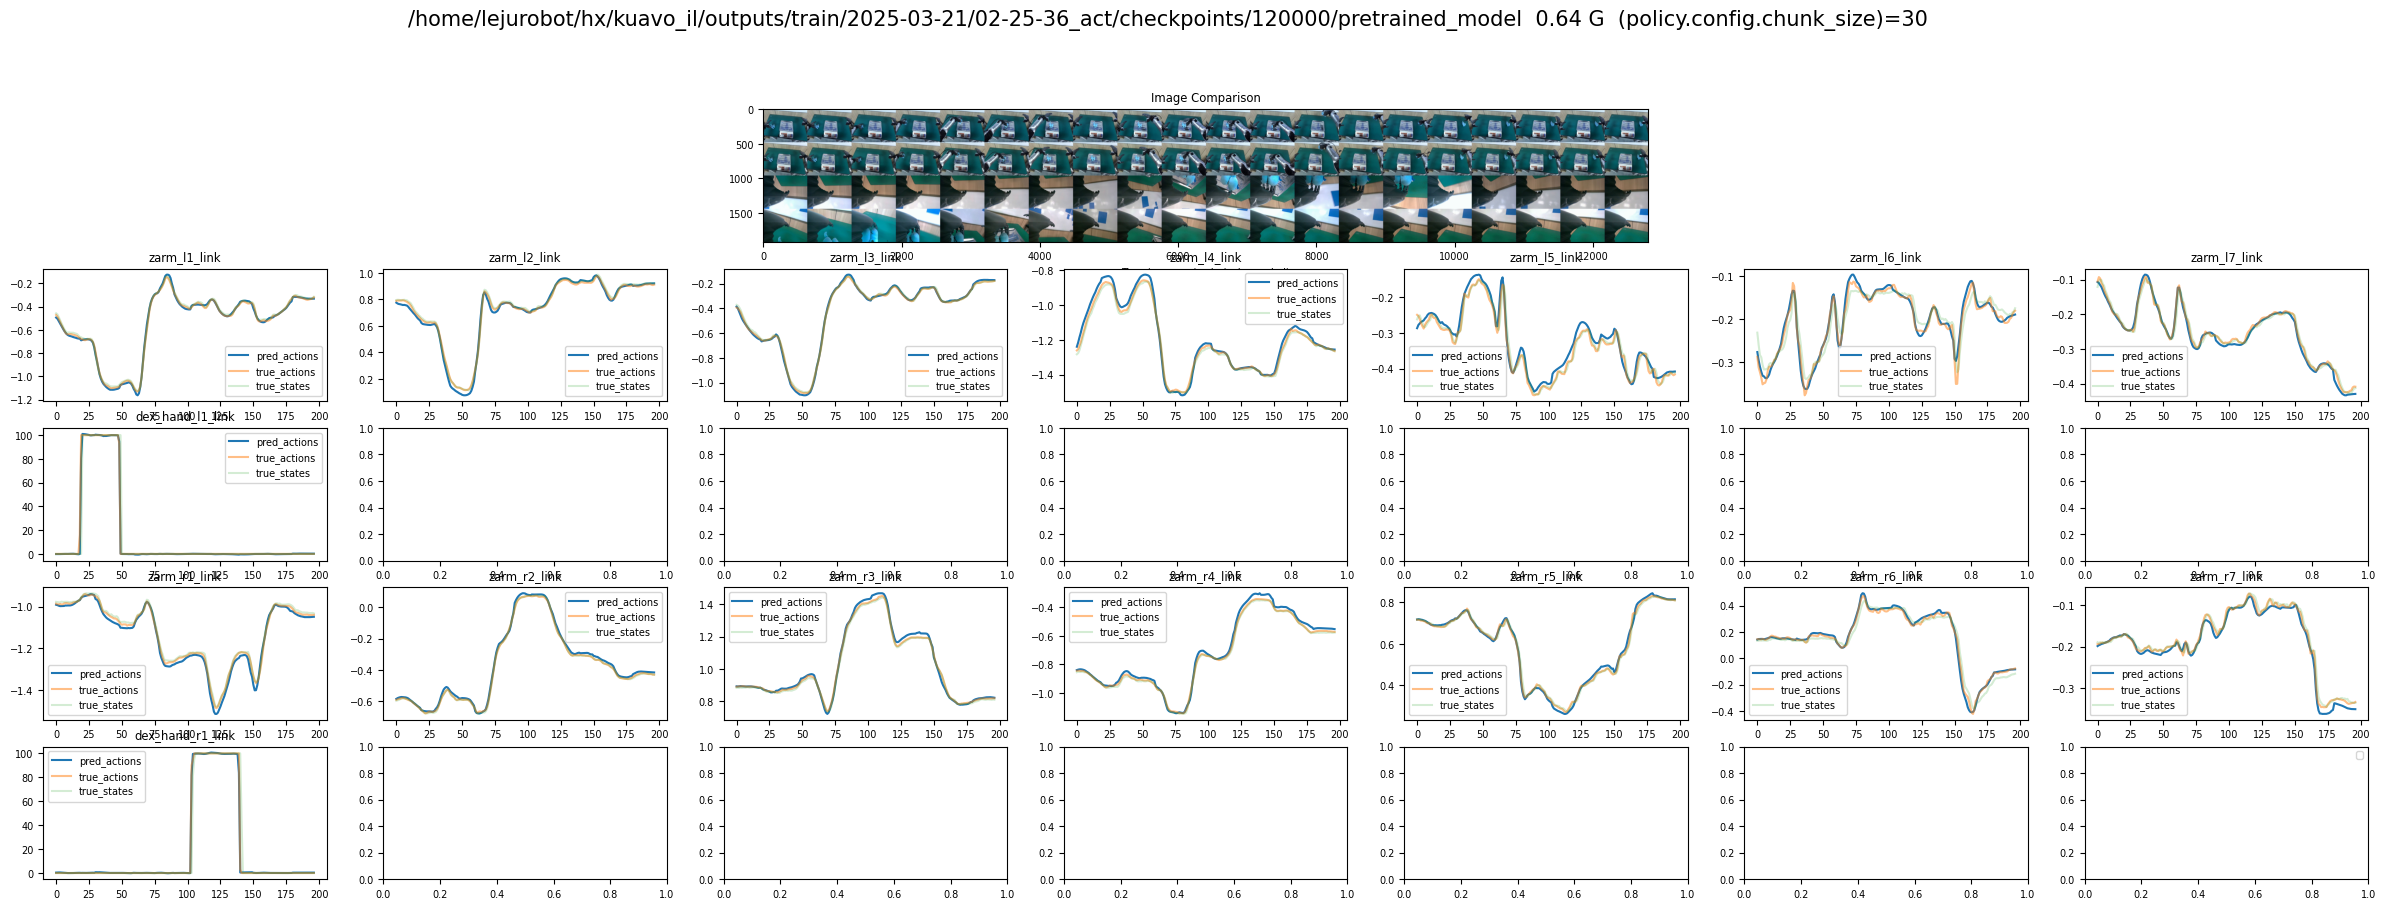

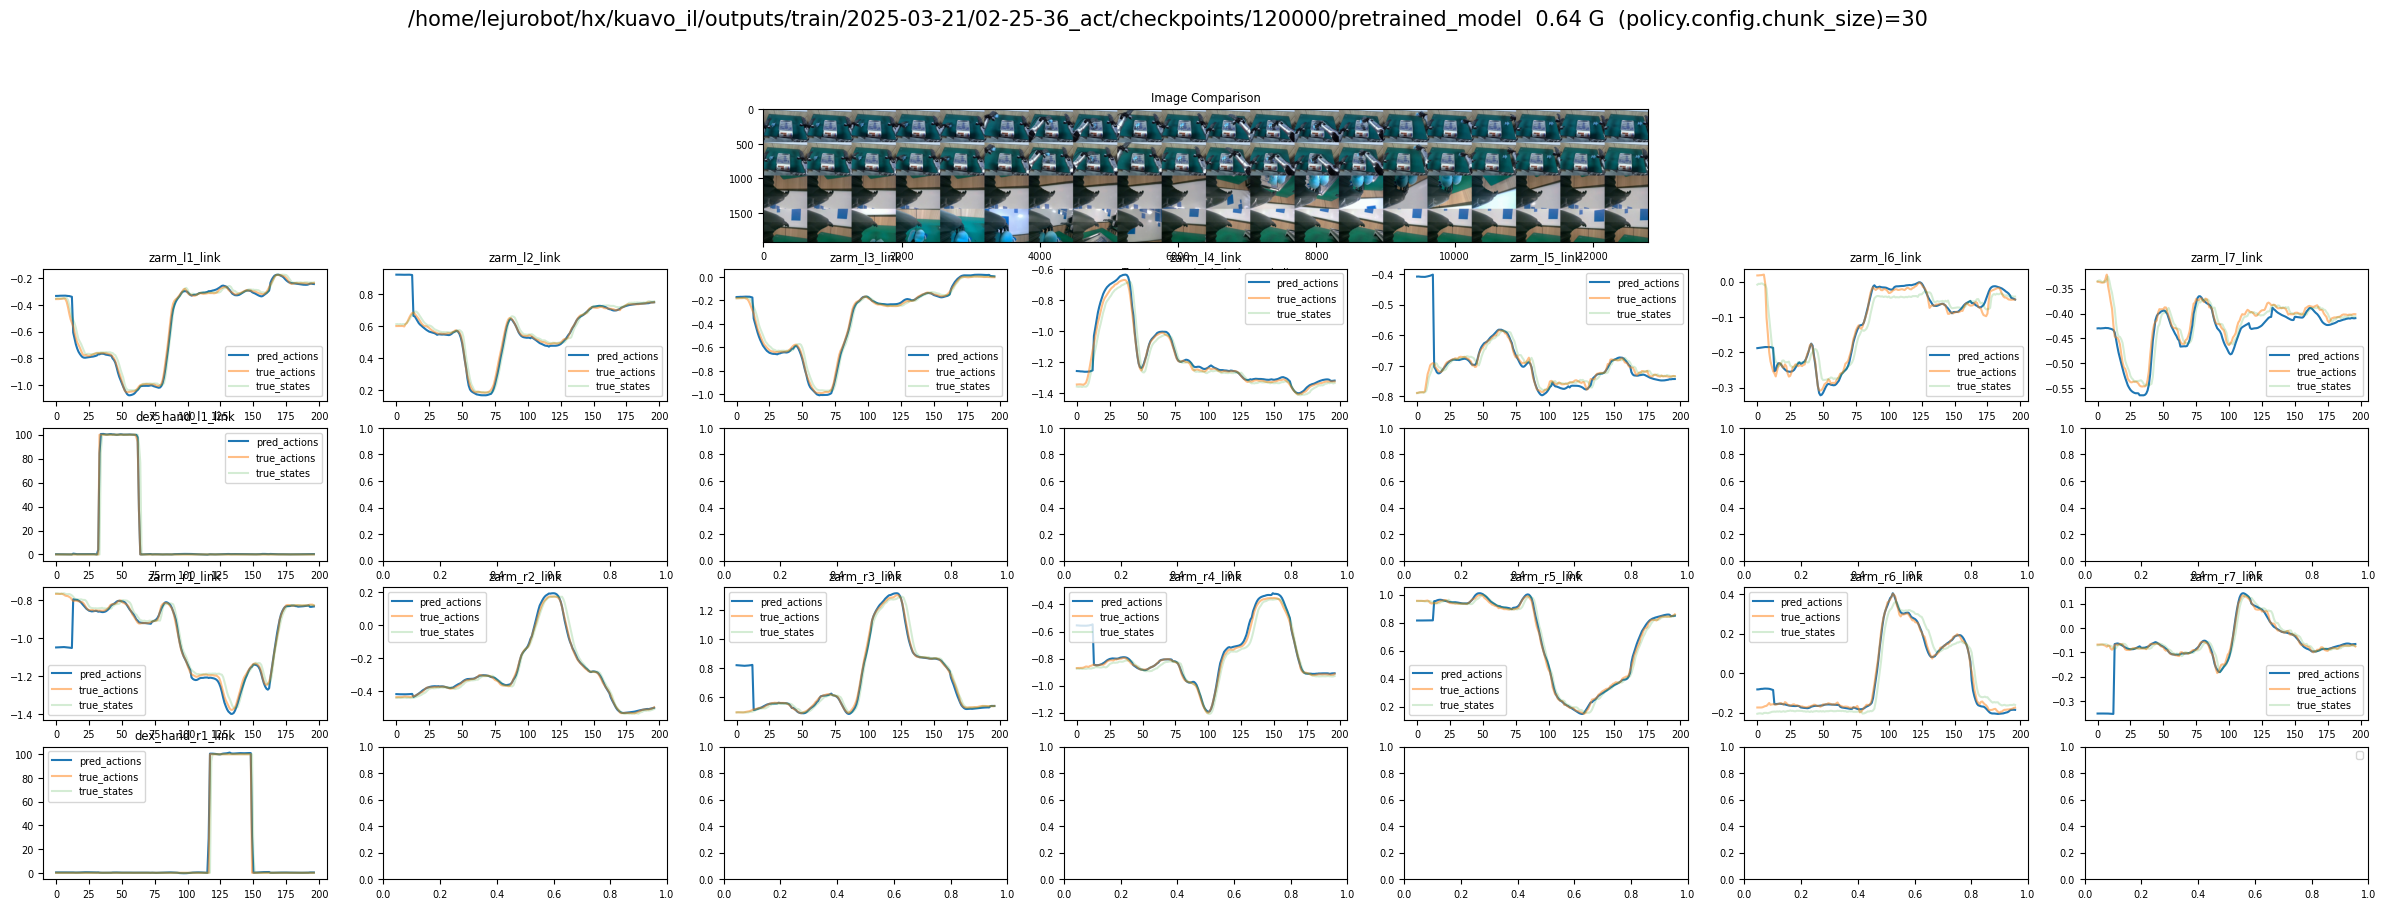

In [ ]:
from kuavo.kuavo_utils.plot import draw_predicted_result
task_name = ckpt_path + '  ' + f"{ckpt_size:.2f} G" + '  ' + f'{(policy.config.chunk_size)=}'
for eps_idx in range(len((all_img['observation.images.cam_l']))):
    draw_predicted_result(task_name, all_img, upBody_lowDim, eps_idx)